In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('finalcut_movies.csv')

In [4]:
data.shape

(47463, 14)

In [5]:
data.head()

,tmdbId,Title,Year,Genres,Language,Runtime,Vote_count,Vote_avg,Director,Keywords,actor1,actor2,actor3,actor4
0,862,Toy Story,1995,Animation Comedy Family,English,81,12628,7.9,John Lasseter,martialarts jealousy toy friendship bullying e...,Tom Hanks,Tim Allen,Don Rickles,Jim Varney
1,8844,Jumanji,1995,Adventure Fantasy Family,English,104,7378,7.2,Joe Johnston,giantinsect boardgame jungle disappearance rec...,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce
2,15602,Grumpier Old Men,1995,Romance Comedy,English,101,203,6.6,Howard Deutch,fishing oldman bestfriend duringcreditsstinger,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren
3,31357,Waiting to Exhale,1995,Comedy Drama Romance,English,127,75,6.2,Forest Whitaker,basedonnovelorbook interracialrelationship sin...,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon
4,11862,Father of the Bride Part II,1995,Comedy,English,106,416,6.2,Charles Shyer,parentchildrelationship baby midlifecrisis con...,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley


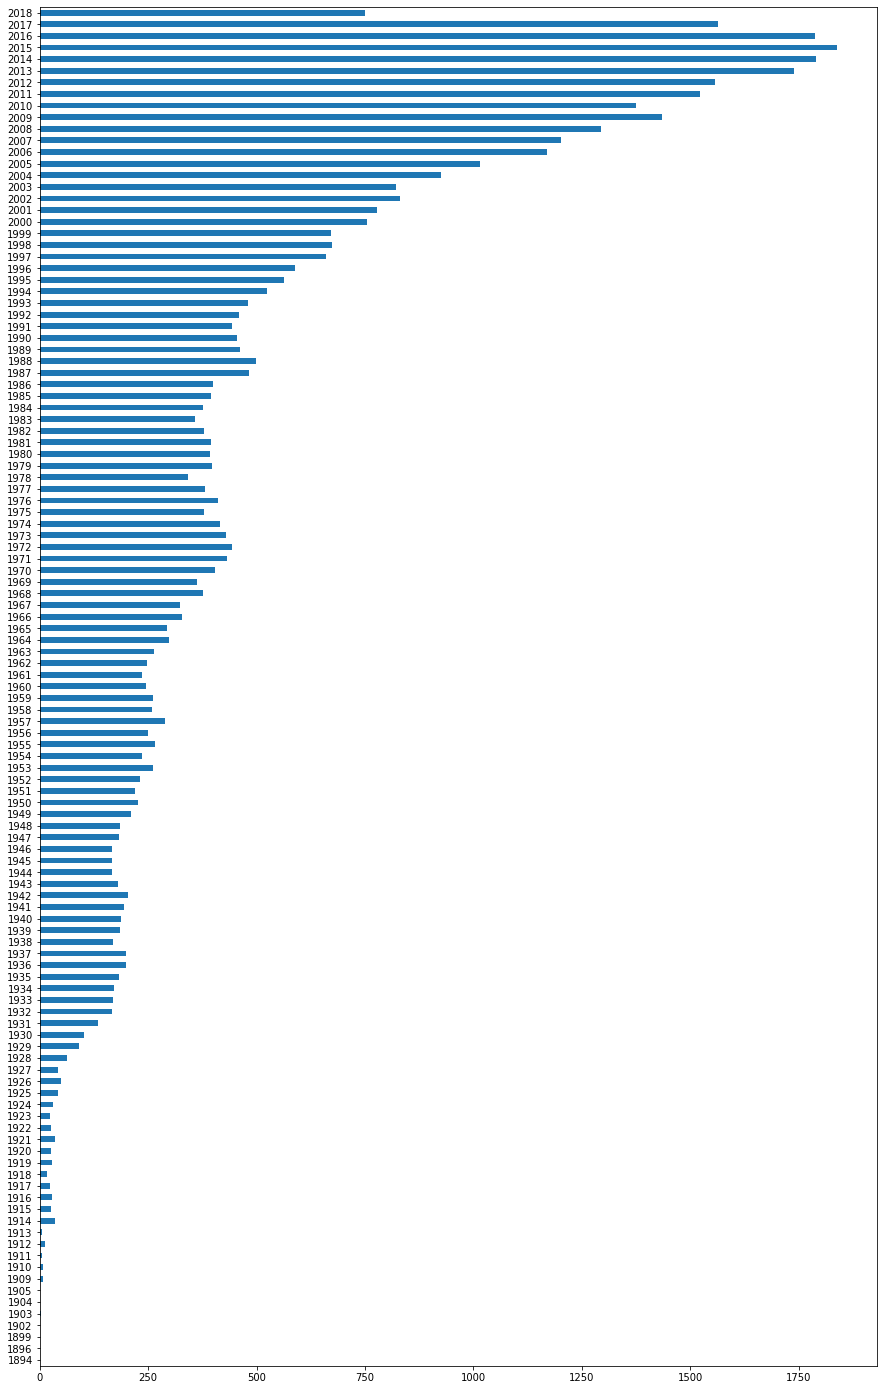

In [6]:
data['Year'].value_counts(dropna=False).sort_index().plot(kind= 'barh', figsize = (15, 25))

In [7]:
#Calculating the mean of vote avg
C = data['Vote_avg'].mean()
C

6.061344626340259

In [8]:
# Calculate the minimum number of votes to be considered
m = data['Vote_count'].quantile(0.75)
m

78.0

In [60]:
# Filtering all the movies that have vote_count more than 'm'
quali = data.copy().loc[data['Vote_count'] >= m]
quali.shape

(11869, 14)

In [61]:
#quali['Vote_avg'] = quali['Vote_avg'].astype(int)

In [62]:
# Calculating the weighted rating of each movie
def weighted_rate(v, R, m=m, C=C):
  ans = (v/(v+m) * R)+(m/(v+m) * C)
  return ans

In [63]:
quali['Score'] = quali.apply(lambda row : weighted_rate(row['Vote_count'], row['Vote_avg']), axis = 1) 

In [64]:
quali = quali.sort_values('Score', ascending=False)

In [65]:
quali.head()

,tmdbId,Title,Year,Genres,Language,Runtime,Vote_count,Vote_avg,Director,Keywords,actor1,actor2,actor3,actor4,Score
304,278,The Shawshank Redemption,1994,Drama Crime,English,142,16681,8.7,Frank Darabont,prison corruption policebrutality prisoncell d...,Tim Robbins,Morgan Freeman,Bob Gunton,Clancy Brown,8.687719
777,238,The Godfather,1972,Drama Crime,English,175,12597,8.7,Francis Ford Coppola,italy lossoflovedone loveatfirstsight italiana...,Marlon Brando,Al Pacino,James Caan,Richard S. Castellano,8.683762
9779,19404,Dilwale Dulhania Le Jayenge,1995,Comedy Drama Romance,Hindi,190,2318,8.7,Aditya Chopra,NaN,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,8.614101
502,424,Schindlers List,1993,Drama History War,English,195,10019,8.6,Steven Spielberg,basedonnovelorbook factory concentrationcamp h...,Liam Neeson,Ben Kingsley,Ralph Fiennes,Caroline Goodall,8.580389
1092,240,The Godfather: Part II,1974,Drama Crime,English,202,7461,8.6,Francis Ford Coppola,italy italianamerican cuba melancholy praise r...,Al Pacino,Robert Duvall,Diane Keaton,Robert De Niro,8.573735


In [66]:
(quali
 .query('Year == "2017"')
 .sort_values('Score', ascending=False).head(10))

,tmdbId,Title,Year,Genres,Language,Runtime,Vote_count,Vote_avg,Director,Keywords,actor1,actor2,actor3,actor4,Score
39476,398818,Call Me by Your Name,2017,Romance Drama,English,132,7477,8.3,Luca Guadagnino,italy upperclass basedonnovelorbook swimmingpo...,Armie Hammer,Timothée Chalamet,Michael Stuhlbarg,Amira Casar,8.276887
43902,432517,Sherlock: The Final Problem,2017,Drama Mystery Thriller,English,90,819,8.4,Benjamin Caron,tvepisode,Benedict Cumberbatch,Martin Freeman,Mark Gatiss,Sian Brooke,8.196639
42583,354912,Coco,2017,Animation Family Comedy Adventure Fantasy,English,105,11700,8.2,Lee Unkrich,mexico guitar musician skeleton music afterlif...,Anthony Gonzalez,Gael García Bernal,Benjamin Bratt,Alanna Ubach,8.185837
43341,406997,Wonder,2017,Drama Family,English,113,5240,8.2,Stephen Chbosky,exclusion bullying coneyisland prejudice schoo...,Jacob Tremblay,Owen Wilson,Julia Roberts,Danielle Rose Russell,8.168632
43012,339877,Loving Vincent,2017,Animation Drama Mystery,English,95,1593,8.2,Dorota Kobiela,painter artist letter investigation bullying s...,Douglas Booth,Eleanor Tomlinson,Robert Gulaczyk,Helen McCrory,8.100170
42525,359940,"Three Billboards Outside Ebbing, Missouri",2017,Crime Drama,English,115,6841,8.1,Martin McDonagh,suicide rape smalltown missouri alcoholism mur...,Frances McDormand,Woody Harrelson,Sam Rockwell,John Hawkes,8.077018
43612,316029,The Greatest Showman,2017,Drama,English,105,6463,8.0,Michael Gracey,circus musical biography diversity basedonatru...,Hugh Jackman,Michelle Williams,Zac Efron,Zendaya,7.976882
40165,400928,Gifted,2017,Drama Family Comedy,English,101,3076,8.0,Marc Webb,cat intellectuallygifted childprodigy mathemat...,Chris Evans,Mckenna Grace,Lindsay Duncan,Jenny Slate,7.952056
43355,430424,See You Up There,2017,Drama Crime Comedy War,French,113,823,8.0,Albert Dupontel,paris france painter worldwari mask banker pos...,Nahuel Pérez Biscayart,Albert Dupontel,Laurent Lafitte,Niels Arestrup,7.832170
39379,263115,Logan,2017,Action Drama Science Fiction,English,137,14527,7.8,James Mangold,cyborg experiment self-destruction mutant futu...,Hugh Jackman,Patrick Stewart,Dafne Keen,Boyd Holbrook,7.790714


In [67]:
conbas_df = quali[['Title','Genres','Director','actor1','actor2','actor3','actor4','Keywords']]

In [68]:
conbas_df.head()

,Title,Genres,Director,actor1,actor2,actor3,actor4,Keywords
304,The Shawshank Redemption,Drama Crime,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,Clancy Brown,prison corruption policebrutality prisoncell d...
777,The Godfather,Drama Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Richard S. Castellano,italy lossoflovedone loveatfirstsight italiana...
9779,Dilwale Dulhania Le Jayenge,Comedy Drama Romance,Aditya Chopra,Shah Rukh Khan,Kajol,Amrish Puri,Anupam Kher,NaN
502,Schindlers List,Drama History War,Steven Spielberg,Liam Neeson,Ben Kingsley,Ralph Fiennes,Caroline Goodall,basedonnovelorbook factory concentrationcamp h...
1092,The Godfather: Part II,Drama Crime,Francis Ford Coppola,Al Pacino,Robert Duvall,Diane Keaton,Robert De Niro,italy italianamerican cuba melancholy praise r...


In [69]:
#converting the names and keyword instances into lowercase and strip all the spaces between them
#conbas_df['Title'] = conbas_df['Title'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['Genres'] = conbas_df['Genres'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['Director'] = conbas_df['Director'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['actor1'] = conbas_df['actor1'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['actor2'] = conbas_df['actor2'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['actor3'] = conbas_df['actor3'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['actor4'] = conbas_df['actor4'].str.replace(' ','').str.lower().str.replace('-','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [70]:
conbas_df['Keywords'] = conbas_df['Keywords'].replace(np.nan, 'Not Available')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
# Making a soup
conbas_df['soup'] = conbas_df['Keywords'] + ' ' + conbas_df['Genres'] + ' ' + conbas_df['Director'] + ' ' + conbas_df['actor1'] + ' ' + conbas_df['actor2'] + ' ' + conbas_df['actor3'] + ' ' + conbas_df['actor4']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
conbas_df.head()

,Title,Genres,Director,actor1,actor2,actor3,actor4,Keywords,soup
304,The Shawshank Redemption,dramacrime,frankdarabont,timrobbins,morganfreeman,bobgunton,clancybrown,prison corruption policebrutality prisoncell d...,prison corruption policebrutality prisoncell d...
777,The Godfather,dramacrime,francisfordcoppola,marlonbrando,alpacino,jamescaan,richards.castellano,italy lossoflovedone loveatfirstsight italiana...,italy lossoflovedone loveatfirstsight italiana...
9779,Dilwale Dulhania Le Jayenge,comedydramaromance,adityachopra,shahrukhkhan,kajol,amrishpuri,anupamkher,Not Available,Not Available comedydramaromance adityachopra ...
502,Schindlers List,dramahistorywar,stevenspielberg,liamneeson,benkingsley,ralphfiennes,carolinegoodall,basedonnovelorbook factory concentrationcamp h...,basedonnovelorbook factory concentrationcamp h...
1092,The Godfather: Part II,dramacrime,francisfordcoppola,alpacino,robertduvall,dianekeaton,robertdeniro,italy italianamerican cuba melancholy praise r...,italy italianamerican cuba melancholy praise r...


In [73]:
conbas_df.columns

Index(['Title', 'Genres', 'Director', 'actor1', 'actor2', 'actor3', 'actor4',
       'Keywords', 'soup'],
      dtype='object')

In [74]:
conbas_df = conbas_df.drop(columns=['Genres', 'Director', 'actor1', 'actor2', 'actor3', 'actor4', 'Keywords'])

In [75]:
conbas_df.head()

,Title,soup
304,The Shawshank Redemption,prison corruption policebrutality prisoncell d...
777,The Godfather,italy lossoflovedone loveatfirstsight italiana...
9779,Dilwale Dulhania Le Jayenge,Not Available comedydramaromance adityachopra ...
502,Schindlers List,basedonnovelorbook factory concentrationcamp h...
1092,The Godfather: Part II,italy italianamerican cuba melancholy praise r...


In [76]:
conbas_df.shape

(11869, 2)

In [77]:
q = pd.merge(quali,conbas_df, left_on=['Title'], right_on=['Title'], how='left')

In [78]:
q = q.drop_duplicates(subset='tmdbId')

In [79]:
q.shape

(11858, 16)

In [83]:
q[q['Title'].str.contains('Scarface')]

,tmdbId,Title,Year,Genres,Language,Runtime,Vote_count,Vote_avg,Director,Keywords,actor1,actor2,actor3,actor4,Score,soup
106,111,Scarface,1983,Action Crime Drama Thriller,English,170,7135,8.1,Brian De Palma,siblingrelationship miami florida corruption l...,Al Pacino,Steven Bauer,Michelle Pfeiffer,Mary Elizabeth Mastrantonio,8.077954,siblingrelationship miami florida corruption l...
1346,877,Scarface,1932,Action Crime Drama Thriller,English,93,270,7.6,Howard Hawks,siblingrelationship chicago usa alcohol basedo...,Paul Muni,Ann Dvorak,Karen Morley,Osgood Perkins,7.255129,siblingrelationship miami florida corruption l...


In [36]:
q[q.duplicated(['Title'])]

,tmdbId,Title,Year,Genres,Language,Runtime,Vote_count,Vote_avg,Director,Keywords,actor1,actor2,actor3,actor4,Score,soup
895,433498,Papillon,2018,Drama History Crime,English,134,986,7.5,Michael Noer,basedonnovelorbook biography remake solitaryco...,Charlie Hunnam,Rami Malek,Christopher Fairbank,Eve Hewson,7.394535,prison prisonescape jungle solitaryconfinement...
1139,648,Beauty and the Beast,1946,Drama Fantasy Romance,French,96,335,7.6,Jean Cocteau,underdog monster beauty rose daughter,Jean Marais,Josette Day,Marcel André,Mila Parély,7.309406,prince book castle rose musical princess beast...
1253,65754,The Girl with the Dragon Tattoo,2011,Thriller Crime Mystery Drama,English,158,4702,7.3,David Fincher,rape journalist basedonnovelorbook journalism ...,Daniel Craig,Rooney Mara,Christopher Plummer,Stellan Skarsgård,7.279788,rape journalist basedonnovelorbook bondage isl...
1346,877,Scarface,1932,Action Crime Drama Thriller,English,93,270,7.6,Howard Hawks,siblingrelationship chicago usa alcohol basedo...,Paul Muni,Ann Dvorak,Karen Morley,Osgood Perkins,7.255129,siblingrelationship miami florida corruption l...
1514,17529,True Grit,1969,Western Drama Adventure,English,128,435,7.4,Henry Hathaway,bountyhunter manhunt,John Wayne,Glen Campbell,Kim Darby,Jeremy Slate,7.196462,lossoflovedone basedonnovelorbook fathermurder...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,11535,Rollerball,2002,Action Science Fiction Thriller,English,98,283,4.0,John McTiernan,manager arena dystopia wrestling sports roller...,Chris Klein,LL Cool J,Rebecca Romijn,Naveen Andrews,4.445387,sportsteam future dystopia games rollerskating...
12714,166424,Fantastic Four,2015,Action Adventure Science Fiction,English,100,4381,4.4,Simon Kinberg,teleportation transformation telekinesis porta...,Miles Teller,Kate Mara,Michael B. Jordan,Jamie Bell,4.429061,flying siblingrelationship fire marriagepropos...
12721,791,The Fog,2005,Horror Thriller,English,100,419,4.1,Rupert Wainwright,california prophecy fire sea beach parentchild...,Tom Welling,Maggie Grace,Selma Blair,DeRay Davis,4.407817,prophecy sea beach gold smalltown beheading sw...
12733,9708,The Wicker Man,2006,Mystery Thriller Horror Drama,English,102,834,4.2,Neil LaBute,california basedonnovelorbook island airplane ...,Nicolas Cage,Ellen Burstyn,Kate Beahan,Frances Conroy,4.359194,scotland basedonnovelorbook island virgin ritu...


In [86]:
q.to_csv('/content/Movies.csv')

In [87]:
q['soup'].head()

0    prison corruption policebrutality prisoncell d...
1    italy lossoflovedone loveatfirstsight italiana...
2    Not Available comedydramaromance adityachopra ...
3    basedonnovelorbook factory concentrationcamp h...
4    italy italianamerican cuba melancholy praise r...
Name: soup, dtype: object

In [88]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(q['soup'])

In [89]:
count_matrix.shape

(11858, 38425)

In [90]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [91]:
# Reset index of your main DataFrame and construct reverse mapping as before
q = q.reset_index()
indices = pd.Series(q.index, index=q['Title'])

In [92]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim = cosine_sim):
    idx = indices[title]  # Get the index of the movie that matches the title
    sim_scores = list(enumerate(cosine_sim[idx]))   # Get the pairwsie similarity scores of all movies with that movie
    #print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort the movies based on the similarity scores
    #print(sim_scores)
    sim_scores = sim_scores[1:11]  # Get the scores of the 15 most similar movies
    #print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]  # Get the movie indices

    movies = q.iloc[movie_indices][['Title', 'Year', 'Score','Language']]  # Getting the weighted ratings of the movies 
    # Return the top 15 most similar movies arranged by ratings
    return movies.sort_values('Score', ascending = False)

In [93]:
get_recommendations('The Dark Knight Rises')

,Title,Year,Score,Language
12,The Dark Knight,2008,8.392010,English
362,Batman Begins,2005,7.691290,English
529,Batman: Under the Red Hood,2010,7.572694,English
1502,Batman: Assault on Arkham,2014,7.172202,English
1940,Batman: Year One,2011,7.051975,English
4119,Justice League: The New Frontier,2008,6.639512,English
5256,DC Showcase: Catwoman,2011,6.474491,English
5709,Kick-Ass 2,2013,6.394156,English
7783,Batman & Harley Quinn,2017,6.093315,English
9607,Batman v Superman: Dawn of Justice,2016,5.801490,English


In [94]:
get_recommendations('Up')

,Title,Year,Score,Language
186,Inside Out,2015,7.890577,English
1437,Remember,2015,7.187774,English
3745,Ice Age: Dawn of the Dinosaurs,2009,6.691337,English
4462,Rush Hour 2,2001,6.583549,English
4586,Dugs Special Mission,2009,6.567681,English
5238,Nicholas Nickleby,2002,6.476320,English
5341,Babies,2010,6.461088,French
5782,The Imaginarium of Doctor Parnassus,2009,6.386652,English
6645,The Last Station,2009,6.267924,English
7710,The International,2009,6.096341,English


In [95]:
get_recommendations('Your Name')

,Title,Year,Score,Language
356,The Girl Who Leapt Through Time,2006,7.694298,Japanese
991,No Game No Life: Zero,2017,7.344127,Japanese
2134,Dragon Ball Z: The History of Trunks,1993,6.995220,Japanese
2494,Children Who Chase Lost Voices from Deep Below,2011,6.912465,Japanese
2726,Our Times,2015,6.872636,Chinese
3802,I Am a Hero,2016,6.685772,Japanese
5362,Its a Boy Girl Thing,2006,6.457231,English
5390,Dragon Ball: Episode of Bardock,2011,6.453094,Japanese
6071,Voices of a Distant Star,2003,6.350589,Japanese
9064,Vice Versa,1988,5.906727,English


In [96]:
get_recommendations('The Place Promised in Our Early Days')

,Title,Year,Score,Language
5,Your Name,2016,8.567453,Japanese
245,Nausicaä of the Valley of the Wind,1984,7.830279,Japanese
304,Whisper of the Heart,1995,7.761968,Japanese
338,The Wind Rises,2013,7.722194,Japanese
629,The Garden of Words,2013,7.502585,Japanese
774,Cowboy Bebop: The Movie,2001,7.432044,Japanese
1357,5 Centimeters per Second,2007,7.216495,Japanese
2494,Children Who Chase Lost Voices from Deep Below,2011,6.912465,Japanese
6071,Voices of a Distant Star,2003,6.350589,Japanese
7629,Get Smart,2008,6.098753,English


In [97]:
get_recommendations('Titanic')

,Title,Year,Score,Language
421,A Walk to Remember,2002,7.655200,English
927,A Short Film About Love,1988,7.367301,Polish
2443,A Night to Remember,1958,6.921572,English
3224,William Shakespeares Romeo + Juliet,1996,6.783237,English
3774,The Scent of Green Papaya,1993,6.688512,Vietnamese
4450,Love Story,1970,6.584954,English
4822,Ghosts of the Abyss,2003,6.533662,English
6686,Iris,2001,6.260237,English
6876,White Palace,1990,6.231751,English
7974,Down by Love,2016,6.085504,French
